# Лабораторна Робота №1

Бабенко Тетяна ФІ-41

<b>Тема</b>: Наука про дані: підготовчий етап <br><br>
<b>Мета роботи</b>: ознайомитися з основними кроками по роботі з даними – workflow від постановки задачі до написання пояснювальної записки, зрозуміти постановку задачі та природу даних, над якими виконується аналітичні операції

In [67]:
# -*- coding: utf-8 -*-
import urllib2
import pandas as pd
import numpy as np
import csv
import time
import pprint
from array import array
#Бібліотека для роботи з графіками
import matplotlib.pyplot as plt
%matplotlib inline

#Функція, яка повертає справжній id країни з сайту 
def get_id(id):
    S=[24,25,5,6,27,23,26,7,11,13,14,15,16,17,18,19,21,22,8,9,10,1,3,2,4]
    return S[id-1]    

#Функція, яка повертає ім'я регіону
def get_name(id):  
    return {
        1: "Vinnitsa",
        2: "Volyn",
        3: "Dnipropetrovsk",
        4: "Donetsk",
        5: "Zhytomyr",
        6: "Zakarpattya",
        7: "Zaporizhzhya",
        8: "Ivano-Frankivsk",
        9: "Kyiv",
       10: "Kirovograd",
       11: "Lugansk",
       12: "Lviv",
       13: "Nicholas",
       14: "Odessa",
       15: "Poltava",
       16: "Rivne",
       17: "Sums",
       18: "Ternopil",
       19: "Kharkiv",
       20: "Kherson",
       21: "Khmelnytsky",
       22: "Cherkasy",
       23: "Chernivtsi",
       24: "Chernihiv",
       25: "Republic of Crimea",
    }.get(id, "nothing")

In [68]:
#Функція, якак повертає ім'я файлу, що завантажується
def filename(id,state):
    strtime = time.strftime("%Y-%m-%d_%Hh%Mm%Ss")
    id = str(id)
    file_name = 'id_'+id+'_'+state+'_'+strtime+'.csv' 
    return file_name

#Функція збереження файлу до домашнього каталогу
def save(id, file):
    if (id<10):
        url=r"http://www.star.nesdis.noaa.gov/smcd/emb/vci/gvix/G04/ts_L1/ByProvince/Mean/L1_Mean_UKR.R0%s.txt" % id
    elif (id>10):
        url=r"http://www.star.nesdis.noaa.gov/smcd/emb/vci/gvix/G04/ts_L1/ByProvince/Mean/L1_Mean_UKR.R%s.txt" % id
    else: 
        print("Error!")
    vhi_url = urllib2.urlopen(url)    
    out = open("/home/tania/datascience/lab_1/data/%s" % file,'wb') 
    out.write(vhi_url.read())    
    out.close()    
    print "VHI is downloaded..."

In [69]:
#Функція, яка завантажує csv-файл до фрейму та видаляє -1 і непотрібні символи
#Сирі дані містятья у каталозі rawdata, а відформатовані у каталог freshdata
def readtoframe(file):
    name_columns = ['Year','Week','SMN','SMT','VCI','TCI','VHI','Area-VHI-LESS-15','Area-VHI-LESS-35']   
    df = pd.read_csv(r"/home/tania/datascience/lab_1/data/%s" % file, header=1) #, index_col=False
    df.columns = name_columns  
    df = df[df.VHI != -1.0]      
    new_file = 'new_' + file
    df.to_csv(r"/home/tania/datascience/lab_1/newdata/%s" % new_file)
    
    

In [70]:
#Функція, яка виводить мінімальний VHI та рік в якому він був, для певного регіону за всі роки
def VHI_min(file,state):
    df = pd.read_csv(r"/home/tania/datascience/lab_1/newdata/%s" % file) 
    print('\nMIN_VHI_'+state+': '+str(df.VHI.min()))
    df = df[df['VHI']==df['VHI'].min()]
    print(int(df.iloc[0,1]))
      
#Функція, яка виводить максимальний VHI та рік в якому він був, для певного регіону за всі роки
def VHI_max(file,state):
    df = pd.read_csv(r"/home/tania/datascience/lab_1/newdata/%s" % file) 
    print('\nMAX_VHI_'+state+': '+str(df['VHI'].max()))
    df = df[df['VHI']==df['VHI'].max()]
    print(int(df.iloc[0,1]))   

#Функція, яка виводить рік та тиждень в яких VHI<15   
def VHI_drought(file,state):
    df = pd.read_csv(r"/home/tania/datascience/lab_1/newdata/%s" % file) 
    df=df[df['VHI']<15]
    print('\nDrought in '+state+' was:')
    print df.loc[:,['Year','Week','VHI']] 
    
 

In [71]:
#Функція, яка будує графіки за певний рік
#Графіки будуються для певної області за рік, які показують залежність аномальні VHI від тижня року. 
def Plot_build(file,state,year1,year2):     
    
    title = state+' VHI'+' '+str(year1)+'-'+str(year2)
    
    i = 0
    while (year1<=year2):  
        df = pd.read_csv(r"/home/tania/datascience/lab_1/newdata/%s" % file) 
        df_new=df[(df['Year']==year1)]
        df_new=df_new.loc[:,['Year','Week','VHI']]  
        plt.plot((df_new['Week']+(52*i)), df_new['VHI'], label=str(year1))
        i=i+1
        year1=year1+1
    plt.title(title,fontsize=20)
    plt.figure(figsize=(10,5))
    plt.xlabel('Week')
    plt.ylabel('VHI')
    plt.ylim(0,100)
    plt.legend()
    plt.grid()  
   
    #return plt.gcf()

def Plot_build2(file,state,year1,year2):  
    title = state+' Average VHI'+' '+str(year1)+'-'+str(year2)
    plt.ylim(0,100)
    plt.xlim(year1,year2)
    plt.xlabel('Year')
    plt.ylabel('VHI')
    while (year1<=year2):  
        df = pd.read_csv(r"/home/tania/datascience/lab_1/newdata/%s" % file) 
        df_new=df[(df['Year']==year1)]
        df_new=df_new.loc[:,['Year','Week','VHI']]  
        plt.scatter(year1 ,df_new['VHI'].mean(), label=str(year1), color='red')
        year1=year1+1
        
    plt.title(title,fontsize=20)
    plt.grid()  
    #return plt.gcf() 

VHI is downloaded...
File: id_24_Vinnitsa_2016-04-24_15h35m05s.csv


MIN_VHI_Vinnitsa: 12.03
2000

MAX_VHI_Vinnitsa: 87.62
1993

Drought in Vinnitsa was:
      Year  Week    VHI
968   2000    47  14.65
969   2000    48  12.03
970   2000    49  13.18
1735  2015    34  14.29
1736  2015    35  12.88
1737  2015    36  14.74


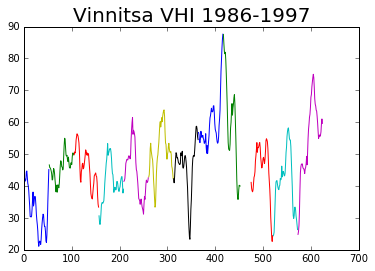

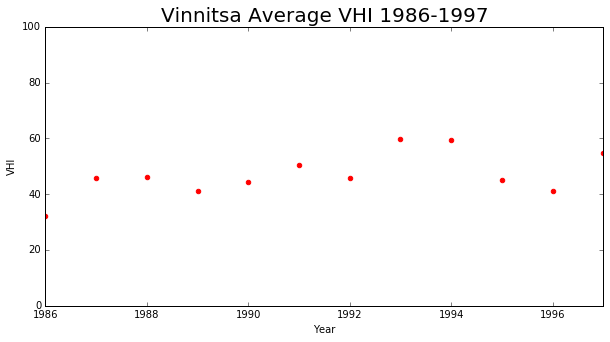

In [72]:
id = 1
year1=1986
year2=1997
state = get_name(id)
new_id = get_id(id)
file_name = filename(new_id,state)
new_file_name = 'new_' + file_name
save(new_id,file_name)
print('File: '+file_name+'\n')
readtoframe(file_name)
VHI_min(new_file_name,state)
VHI_max(new_file_name,state)
VHI_drought(new_file_name,state)
Plot_build(new_file_name,state,year1,year2)
Plot_build2(new_file_name,state,year1,year2)

# Висновок
На цій лабораторній роботі я отримала елементарні знання в області DataScience. Дані для дослідження були взяті з сайту http://www.star.nesdis.noaa.gov. Цей сайт є центром по застосуванню супутникових систем і досліджень процесів, які відбуваються на нашій планеті. Дані, які я використовувала пов'язані з індексом VHI - це вегетаційний індекс, який базується на відбитті видимого світла рослинним покривом. Вони були досліджені для різних областей України. Так звані сирі дані(raw data) були завантажені до фрейму та змінені відповідно до завдання. Було виконане додаткове завдання для виведення аномальних показників VHI.
Побудовано графіки для певної області за різні роки, які показують залежність аномального VHI індексу від тижня року. 